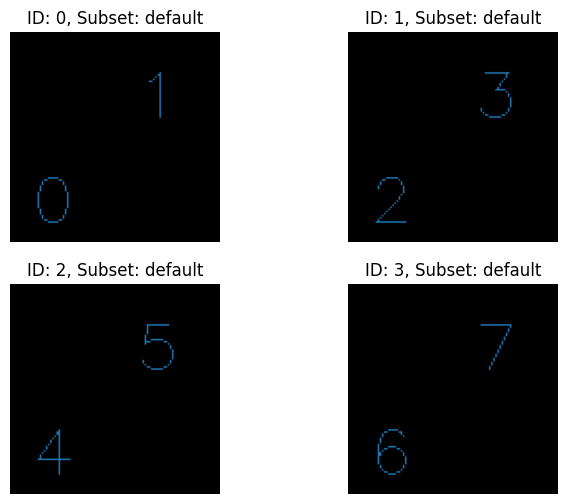

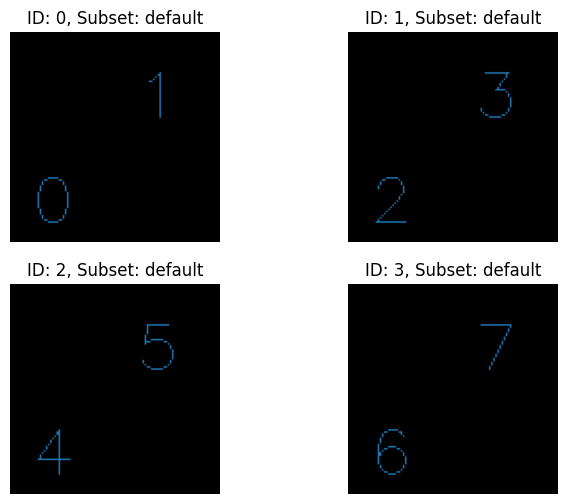

In [1]:
import datumaro as dm
import numpy as np
import cv2

def _make_mask(inst_id: int) -> np.ndarray:
    mask = np.zeros([100, 100, 1], dtype=np.uint8)
    offset = 50 * (inst_id % 2)
    mask = cv2.putText(mask, f"{inst_id}", (10 + offset, 100 - 10 - offset,), cv2.FONT_HERSHEY_SIMPLEX, 1, 255)
    return np.squeeze(mask, axis=-1).astype(bool)

# Create a synthetic dataset, you may actually import the dataset as dm.Dataset.import_from().
dataset = dm.Dataset.from_iterable(
    [
        dm.DatasetItem(
            id=item_id,
            media=dm.Image(data=np.zeros([100, 100, 3], dtype=np.uint8)),
            annotations=[
                dm.Mask(
                    id=inst_id, # Instance id can exist in id field,
                    group=inst_id, # or in group field,
                    image=_make_mask(inst_id),
                    attributes={"inst_id": inst_id}, # or in attributes field.
                    label=0, # We assume that the class label as 0 for all masks in this example.
                )
                for inst_id in range(item_id * 2, item_id * 2 + 2)
            ],
        )
        for item_id in range(4)
    ],
    categories=["label_0", "label_1"],
)

# Visualize it. Because the class label is 0 for all masks, colors of all masks are same (blue).
viz = dm.Visualizer(dataset, ignored_types=[dm.AnnotationType.bbox])
viz.vis_gallery([item_id for item_id in range(4)], dm.DEFAULT_SUBSET_NAME)

In [2]:
# You may have a map, {instance_id: class_id}
map_inst_id_to_label_id = {
    inst_id: inst_id % 2
    for inst_id in range(8)
}

# Convert label_id mannually and export it to coco_instances
for item in dataset:
    for ann in item.annotations:
        if ann.type == dm.AnnotationType.mask:
            inst_id = ann.id
            ann.label = map_inst_id_to_label_id[inst_id]

dataset.export("ws_test/inst-mask", "coco_instances", save_media=True)

/home/vinnamki/datumaro/datumaro/components/visualizer.py:310: UserWarning: Mask should has dtype == bool, but its dtype == uint8. Try to change it to bool dtype.
  warnings.warn(
/home/vinnamki/datumaro/datumaro/components/visualizer.py:267: UserWarning: bbox in self.ignored_types. Skip it.
  warnings.warn(msg)


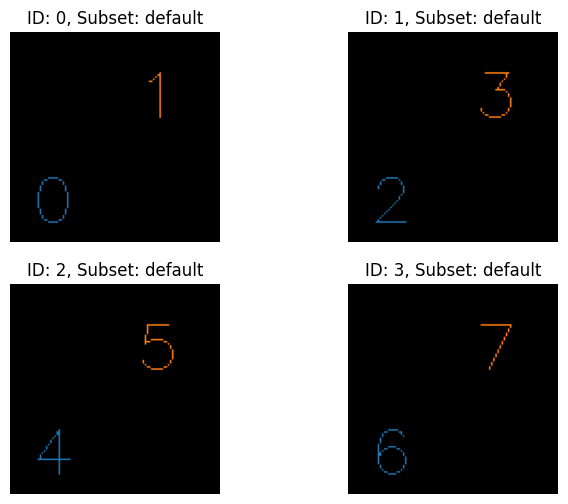

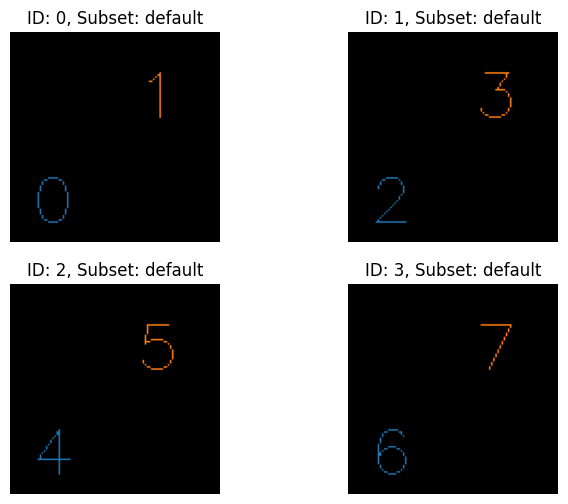

In [3]:
# Visualize the coco_instances exported dataset.
# In this time, we can see each mask has its class label.
imported_dataset = dm.Dataset.import_from("ws_test/inst-mask", "coco_instances")
viz = dm.Visualizer(imported_dataset, ignored_types=[dm.AnnotationType.bbox])
viz.vis_gallery([item_id for item_id in range(4)], dm.DEFAULT_SUBSET_NAME)